# Data Science Blog Post Project - Seattle AirBnB Data Analysis

### In this project, I will be analyzing Seattle AirBnB data using the Cross-Industry Process for Data Mining (CRISP-DM). This project is part of a Udacity Data Scientist for Enterprise Nanodegree Program.

## 1. Business Understanding

In this project, I have gathered the Seattle AirBnB data provided by Kaggle here (https://www.kaggle.com/airbnb/seattle). <br>
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA. <br>
The following Airbnb activity is included in this Seattle dataset: 
<br>
Listings, including full descriptions and average review score 
<br>
Reviews, including unique id for each reviewer and detailed comments 
<br>
Calendar, including listing id and the price and availability for that day
<br>
The data comes in the form of 3 different files: Calendar.csv, Listings.csv, and Reviews.csv. Based on the type of data I have, I will look to answer the following questions: <br>

1. Which AirBnB listings are the most expensive? <br>
2. Does the overall price of AirBnbs change throughout the year? (Possible impact by seasons)<br>
3. What areas of Seattle do customers prefer to stay in and which do they avoid? (Popular Neighborhoods vs Unpopular Neighborhoods)<br>
4. What is the average price in the popular neighborhood versus the unpopular neighborhood?<br>

## 2. Data Understanding

First I will gather and assess the data from my 3 files to see how each file could possibly help me answer my questions. To do this I will first import the necessary libraries that I will be using in this project.

In [1]:
#import necessary libraries for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

In [2]:
listings_df = pd.read_csv('seattle/listings.csv')
reviews_df = pd.read_csv('seattle/reviews.csv')
calendar_df = pd.read_csv('seattle/calendar.csv')

Now that I have loaded my data into my notebook. Let's first take a quick look at the listings data to understand what it contains.

In [3]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
listings_df.shape

(3818, 92)

In [5]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

I see that there are a lot of features in this dataset that could be useful for answering all kinds of questions! I wont need all of this data so I'll need to make sure to remove any columns that I may not help me answer my questions. I can certainly use some data points to answer my questions such as neighbourhoods that would be very useful for this project.

Next, let's look at the reviews and calendar datasets

In [6]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
reviews_df.shape

(84849, 6)

In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [9]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [10]:
calendar_df.shape

(1393570, 4)

In [11]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Based on a quick view of the above files, it looks like I will need to combine by data so I can be able to answer some of my questions to leverage the pieces of each dataset that may be relevant.

In my next step I will cleanse my data to have it prepared for use in later steps

## 3. Data Preparation

Starting with the listings dataset, I will remove any unneeded columns first. Then I will prep the columns such as price so that it is represented properly as a number versus as a string - removing unwanted characters as well.

In [12]:
listings_df = listings_df.drop(['listing_url','description','summary','space','availability_30', 'availability_60', 'availability_90','host_about','notes','neighborhood_overview', 'transit','street','city','security_deposit','cleaning_fee','smart_location',
             'availability_365','host_listings_count', 'minimum_nights', 'maximum_nights','description','scrape_id','last_scraped','experiences_offered','thumbnail_url','medium_url','monthly_price', 'weekly_price',
            'picture_url','xl_picture_url','host_acceptance_rate','host_picture_url','host_thumbnail_url','host_has_profile_pic','square_feet','state','country_code','country','host_response_time', 'host_verifications',
            'has_availability','calculated_host_listings_count','host_total_listings_count','host_url','license','host_location','host_acceptance_rate', 'host_response_rate','host_neighbourhood','host_since','is_location_exact','calendar_last_scraped','requires_license','jurisdiction_names'],axis=1)

In [13]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 40 columns):
id                                  3818 non-null int64
name                                3818 non-null object
host_id                             3818 non-null int64
host_name                           3816 non-null object
host_is_superhost                   3816 non-null object
host_identity_verified              3816 non-null object
neighbourhood                       3402 non-null object
neighbourhood_cleansed              3818 non-null object
neighbourhood_group_cleansed        3818 non-null object
zipcode                             3811 non-null object
market                              3818 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        38

In [14]:
listings_df['price'] = listings_df['price'].str.replace('$', '')
listings_df['price'] = listings_df['price'].str.replace(',', '')
listings_df['price'] = listings_df['price'].astype(float)
listings_df['price'].fillna(0, inplace=True)
listings_df['id'] = listings_df['id'].astype(str)
listings_df.head()

,id,name,host_id,host_name,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,market,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,calendar_updated,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,241032,Stylish Queen Anne Apartment,956883,Maija,f,t,Queen Anne,West Queen Anne,Queen Anne,98119,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,$5.00,4 weeks ago,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,4.07
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,t,t,Queen Anne,West Queen Anne,Queen Anne,98119,Seattle,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1,$0.00,today,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,1.48
2,3308979,New Modern House-Amazing water view,16708587,Jill,f,t,Queen Anne,West Queen Anne,Queen Anne,98119,Seattle,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,10,$25.00,5 weeks ago,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,1.15
3,7421966,Queen Anne Chateau,9851441,Emily,f,t,Queen Anne,West Queen Anne,Queen Anne,98119,Seattle,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,1,$0.00,6 months ago,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN
4,278830,Charming craftsman 3 bdm house,1452570,Emily,f,t,Queen Anne,West Queen Anne,Queen Anne,98119,Seattle,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,6,$15.00,7 weeks ago,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,0.89


For the calendar dataset, for date I will convert from string to date type. Also, since I want to know how prices may be throughout the year, I will also extract month from my date so that I can use it later in my analysis.

In [15]:
calendar_df['price'] = calendar_df['price'].str.replace('$', '')
calendar_df['price'] = calendar_df['price'].str.replace(',', '')
calendar_df['price'] = calendar_df['price'].astype(float)
calendar_df['price'].fillna(0, inplace=True)
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df['month'] = (pd.to_datetime(calendar_df['date'])).dt.month
calendar_df['listing_id'] = calendar_df['listing_id'].astype(str)

In [16]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
listing_id    1393570 non-null object
date          1393570 non-null datetime64[ns]
available     1393570 non-null object
price         1393570 non-null float64
month         1393570 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 53.2+ MB


For the reviews data, the data is overall clean aside from a few null comments and a string type for date which I will convert to date type. I dont really need the comments in this project so I will drop the column.

In [17]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
reviews_df['listing_id'] = reviews_df['listing_id'].astype(str)
reviews_df = reviews_df.drop('comments',axis=1) 

In [18]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 5 columns):
listing_id       84849 non-null object
id               84849 non-null int64
date             84849 non-null datetime64[ns]
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.2+ MB


Finally, I will merge all 3 datasets into one single dataset to make it easier to work with in later steps. I may have some duplicate columns which I will also remove.

In [19]:
all_listings_info_df = listings_df.merge(calendar_df, left_on='id', right_on='listing_id')
all_listings_info_df = all_listings_info_df.merge(reviews_df, left_on='id', right_on='listing_id',how='outer')

In [20]:
all_listings_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31198740 entries, 0 to 31198739
Data columns (total 50 columns):
id_x                                object
name                                object
host_id                             int64
host_name                           object
host_is_superhost                   object
host_identity_verified              object
neighbourhood                       object
neighbourhood_cleansed              object
neighbourhood_group_cleansed        object
zipcode                             object
market                              object
latitude                            float64
longitude                           float64
property_type                       object
room_type                           object
accommodates                        int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                            object
amenities             

In [21]:
all_listings_info_df = all_listings_info_df.drop(['price_y','listing_id_x','date_y'],axis=1)
all_listings_info_df.rename(columns={'price_x':'price', 'listing_id_y': 'listing_id', 'date_x':'date'}, inplace=True)
all_listings_info_df.head()

,id_x,name,host_id,host_name,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,market,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,calendar_updated,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,date,available,month,listing_id,id_y,reviewer_id,reviewer_name
0,241032,Stylish Queen Anne Apartment,956883,Maija,f,t,Queen Anne,West Queen Anne,Queen Anne,98119,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,$5.00,4 weeks ago,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,4.07,2016-01-04,t,1,241032,682061.0,479824.0,Bro
1,241032,Stylish Queen Anne Apartment,956883,Maija,f,t,Queen Anne,West Queen Anne,Queen Anne,98119,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,$5.00,4 weeks ago,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,4.07,2016-01-04,t,1,241032,691712.0,357699.0,Megan
2,241032,Stylish Queen Anne Apartment,956883,Maija,f,t,Queen Anne,West Queen Anne,Queen Anne,98119,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,$5.00,4 weeks ago,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,4.07,2016-01-04,t,1,241032,702999.0,1285567.0,Marylee
3,241032,Stylish Queen Anne Apartment,956883,Maija,f,t,Queen Anne,West Queen Anne,Queen Anne,98119,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,$5.00,4 weeks ago,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,4.07,2016-01-04,t,1,241032,717262.0,647857.0,Graham
4,241032,Stylish Queen Anne Apartment,956883,Maija,f,t,Queen Anne,West Queen Anne,Queen Anne,98119,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,$5.00,4 weeks ago,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,4.07,2016-01-04,t,1,241032,730226.0,1389821.0,Franka


In [22]:
all_listings_info_df.shape

(31198740, 47)

In [23]:
all_listings_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31198740 entries, 0 to 31198739
Data columns (total 47 columns):
id_x                                object
name                                object
host_id                             int64
host_name                           object
host_is_superhost                   object
host_identity_verified              object
neighbourhood                       object
neighbourhood_cleansed              object
neighbourhood_group_cleansed        object
zipcode                             object
market                              object
latitude                            float64
longitude                           float64
property_type                       object
room_type                           object
accommodates                        int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                            object
amenities             

I have now merged all my separate datasets into one merged dataset.

Let's move on to the next steps where I can now use my dataset to answer some of my questions

## 4. Analyze, Model and Visualize

In this section I will be analyzing the dataset to answer my business questions and provide visualizations that support the answers to my questions.

### Question 1. Which AirBnB listings are the most expensive?

Since there are multiple listings for each listing_id, I will take the average prices for each listing_id and compare that to the other averages.

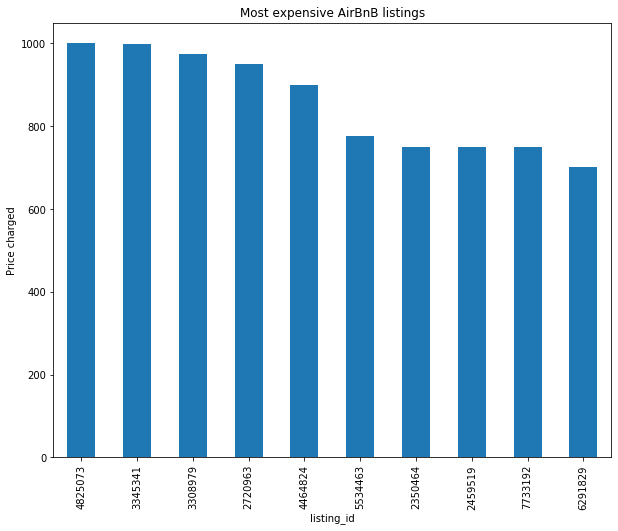

In [24]:
test=all_listings_info_df.groupby('listing_id')['price'].mean().nlargest(10)
test.plot(kind="bar", figsize=(10,8))
plt.ylabel('Price charged')
plt.title("Most expensive AirBnB listings")
plt.show()

Based on my visualization above, I can see that listing id 4825073 is the most expensive AirBnB listing on average from my entire dataset. Listing id 3345341 is almost as expensive as well and worth a mention. From here, If I wanted I can pull up more information on this specific listing id to see where this listing is located and possible what this listing provides.

### Question 2. Does the overall price of AirBnbs change throughout the year? (Possible impact by seasons)

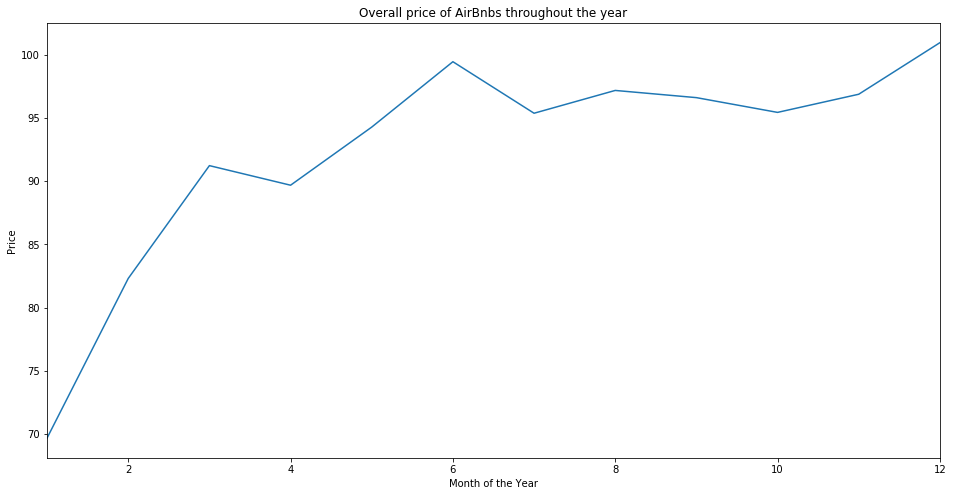

In [25]:
calendar_df.groupby('month')['price'].mean().plot(kind='line',figsize=(16,8))
plt.ylabel('Price')
plt.xlabel('Month of the Year')
plt.title("Overall price of AirBnbs throughout the year")
plt.show()

Based on the visual above, it looks like the first few months of the year experience lower prices with a quick spike in the summer where the average prices jump above 100 and then higher prices towards the end of the year. This could possibly relate to tourists preferring to travel during the summer/fall seasons and during the holidays which the hosts in Seattle certainly take advantage of.

### Question 3. What areas of Seattle do customers prefer to stay in and which do they avoid? (Popular Neighborhoods vs Unpopular Neighborhoods)

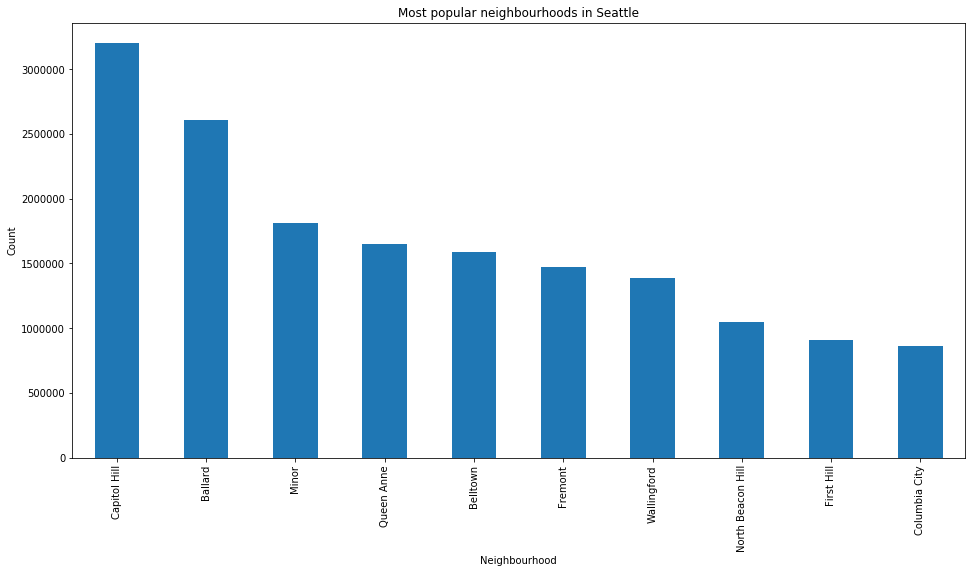

In [26]:
Top10Neighbourhoods = all_listings_info_df['neighbourhood'].value_counts().nlargest(10)
Top10Neighbourhoods.plot(kind='bar',figsize=(16,8))
plt.ylabel('Count')
plt.xlabel('Neighbourhood')
plt.title("Most popular neighbourhoods in Seattle")
plt.show();

From looking at the visual above, it looks pretty obvious that most tourists prefer to stay in the areas of Capitol Hill, Ballard, Minor, Queen Anne, and Belltown.

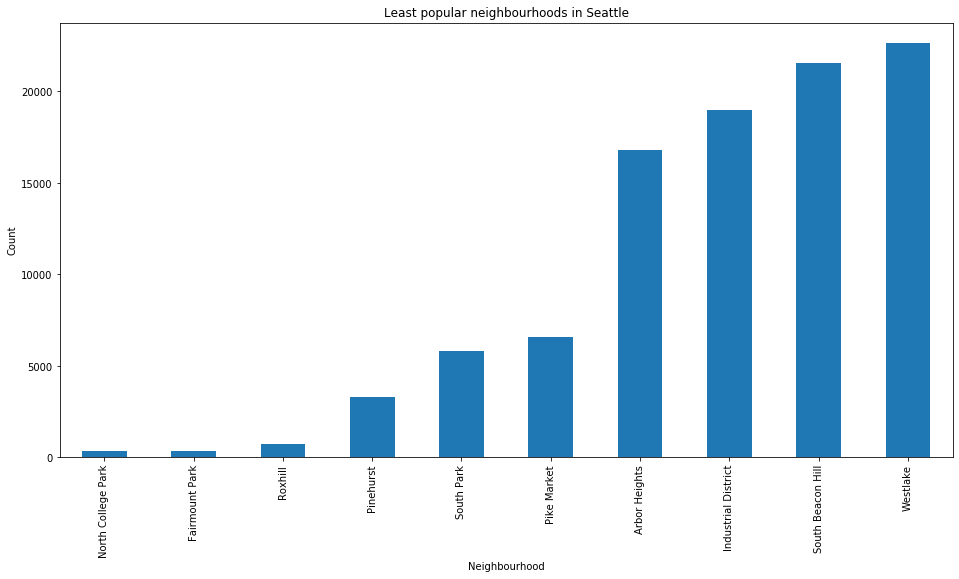

In [27]:
Bottom10Neighbourhoods = all_listings_info_df['neighbourhood'].value_counts().nsmallest(10)
Bottom10Neighbourhoods.plot(kind='bar',figsize=(16,8))
plt.ylabel('Count')
plt.xlabel('Neighbourhood')
plt.title("Least popular neighbourhoods in Seattle")
plt.show();

When I look at the least popular neighborhoods with the visual above, I can see that tourists tend to avoid booking listings in the areas of Fairmount Park, North College Park, Roxhill, Pinehurst, and South Park.

### Question 4. What is the average price in the popular neighbourhood versus the unpopular neighborhood?

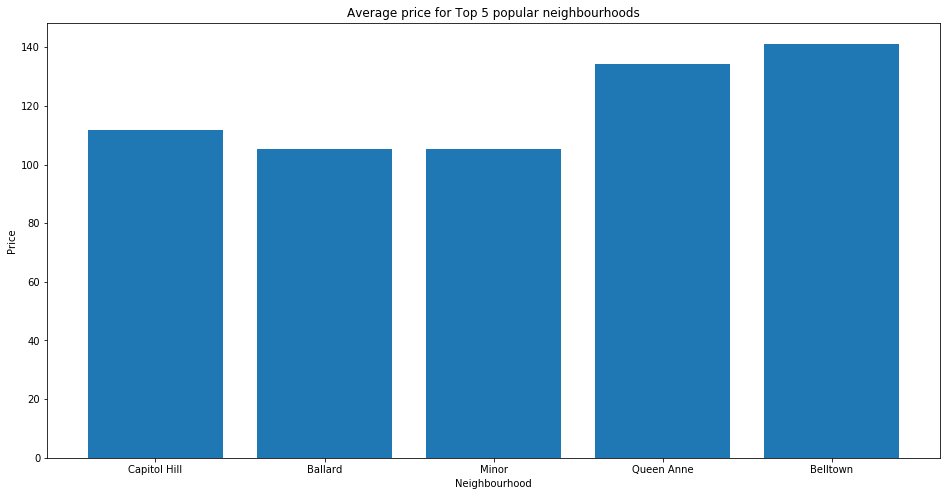

In [28]:
Top10NeighbourhoodNames = ['Capitol Hill', 'Ballard', 'Minor', 'Queen Anne', 'Belltown']
Top10NeighbourhoodPrices = []
for col in Top10NeighbourhoodNames:
    price = all_listings_info_df[all_listings_info_df['neighbourhood'] == col]['price'].mean()
    Top10NeighbourhoodPrices.append(price)

plt.figure(figsize=(16,8))
plt.bar(Top10NeighbourhoodNames, Top10NeighbourhoodPrices)
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.title("Average price for Top 5 popular neighbourhoods")
plt.show();

When I further dive into the popular neighbourhoods to see their average price, I can see that the most popular neighbourhoods are not necessarily the priciest options. The  most popular neighbourhood averages around 116 while some of the other popular neighbourhoods like Belltown average a higher price at almost 140.

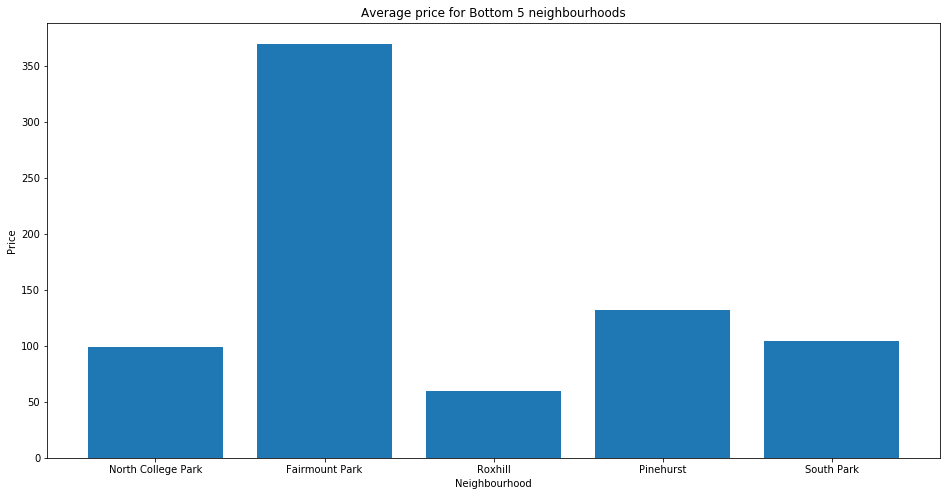

In [29]:
Bottom10NeighbourhoodNames = ['North College Park', 'Fairmount Park', 'Roxhill', 'Pinehurst', 'South Park']
Bottom10NeighbourhoodPrices = []
for col in Bottom10NeighbourhoodNames:
    price = all_listings_info_df[all_listings_info_df['neighbourhood'] == col]['price'].mean()
    Bottom10NeighbourhoodPrices.append(price)

plt.figure(figsize=(16,8))
plt.bar(Bottom10NeighbourhoodNames, Bottom10NeighbourhoodPrices)
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.title("Average price for Bottom 5 neighbourhoods")
plt.show();

As for the least popular neighbourhoods, when looking at the visual above I get somewhat of an unexpected result. I can see that North College Park has average price around 100 but the second least popular neighbourhood (Fairmount Park) has average prices over 350! When thinking further on why this might be, I think that perhaps it could be due to the area being similar to a Beverly Hills-like setting where it is a very upper class neighbourhood and thus it is pricey, resulting in making the neighbourhood "less" popular. This was a pretty neat find and helped answer my question more than I hoped for.